# Graphimate
##### A fun wrapper and for producing iterated movies from iterative FDG graph layout optimizations

# Graphimate workflow

##### Ver:: A0.1.0
##### Author(s) : Issac Goh
##### Date : 230820;YYMMDD
### Author notes
    - Current defaults scrape data from web, so leave as default and run
    
### Features to add
    - Add support for plotting modules from igraph
    
### Modes to run in
    - FA2/FR

In [1]:
# ! pip install FA2nimate
import graphimate as gph

# Data input module

In [2]:
adatas_dict = {
'YS_wget':'https://app.cellatlas.io/yolk-sac/dataset/23/download',
'example_wget':'https://app.cellatlas.io/yolk-sac/dataset/15/download',
'example_YS_myeloid_wget':'https://app.cellatlas.io/yolk-sac/dataset/10/download',
}

# setup model parameters:
model_params = {
# data loader params
'data_key_use':'example_YS_myeloid_wget',
'data_merge':False,
'QC_normalise':False,
'backed':'r',

# Animation parameters
'feat_use': 'cell.labels',
'use_initial' : 'X_pca', # what partition should we extract positions from?
'n_iterations' : 500, #Increase if experiencing max iter issues
'knn_key' : 'neighbors', # If you used KNN in scapy, this would be neighbors by default, but any other key must be stored in .obsp and have a call out in .uns (see scanpy default structure for more info)
'edges': False,  # set to True to plot edges between cells
'edge_subset' : 0.2   ,
'desired_total_duration' : 30,  # Your desired total duration in seconds
'resolution' : (1080,720),#(1920, 1080)  # output movie resolution
'dpi' : 150,   # Pixel density of output
'alg':'FA2', # This defaults to the FA2 algorythym.
'skip_iterations': 1, #Number of iterations to skip between frames
'explosion_duration':0.15, # duration of the interpolated explosion sequence in seconds
'var_length' : 7500, # If we need to compute a PCA transformation, how many VAR should we use?
'out_path':'./',
'markersize':'10',
    
# Stratified Bayes sampler kwargs
'sample_data_knn':False, 
'sampling_rate': 0.5,# Apply empirical bayes sampling weighted by knn?
'iterations': 2,#How many iterations of sampling to use for empirical bayes sampler? Set this to 1 if you do not want any upsampling of rare-states. Probabilities update for each iteration and favour rare-states, increasing iter, naturally increases rare-sampling events
'representation_priority': 0.95, # This exponentially controls the sampling rate for rare-states, where 1 represents low-prioritisation, 0.1 represetns maximum prioritisation
'replace': False, # Allows model to clone cells
'equal_allocation': False, # Forces model to create equal representation sets
'weight_penalty': 'connectivity_ratio', # Or 'entropy_distance' or "connectivity_ratio"
}

In [3]:
# Let's load our dataset first. We can do this in backed mode
adata =  gph.load_adatas(adatas_dict, **model_params)
# Now let's register our data, this step checks the model parameters and set's global defaults
adata,positions,snn = gph.register_data(adata, **model_params)

# Optionally, we can perform some sampling to up sample rare-states and allow them to impact the resultant model optimisation
if model_params['sample_data_knn'] != False:
    print('Empirical bayes sampling option selected')
    adata_samp, indices = gph.empirical_bayes_balanced_stratified_KNN_sampling(adata, **model_params)
    gph.plot_sampling_metrics(adata,adata_samp, **model_params)
    adata = adata_samp.to_memory()
print('adata registered')

Loading anndata from web source
initialisation coordinates not detected in data, proceeding to compute PCA
We are assuming your data is pre-normalised
unable to compute dispersion, is your data norm?
proceeding to compute PCA on all genes as Highly var was not possible
Unable to locate your KNN graph, we will look for the key in obsp
initialisation graph not detected in data, proceeding to compute KNN
adata registered


# Animation setup using model_params

You do not provide a color key in .uns, we will randomly generate one
Moviepy - Building video .//15082023_1416fa2_animation.mp4.
Moviepy - Writing video .//15082023_1416fa2_animation.mp4



Moviepy - Done !
Moviepy - video ready .//15082023_1416fa2_animation.mp4


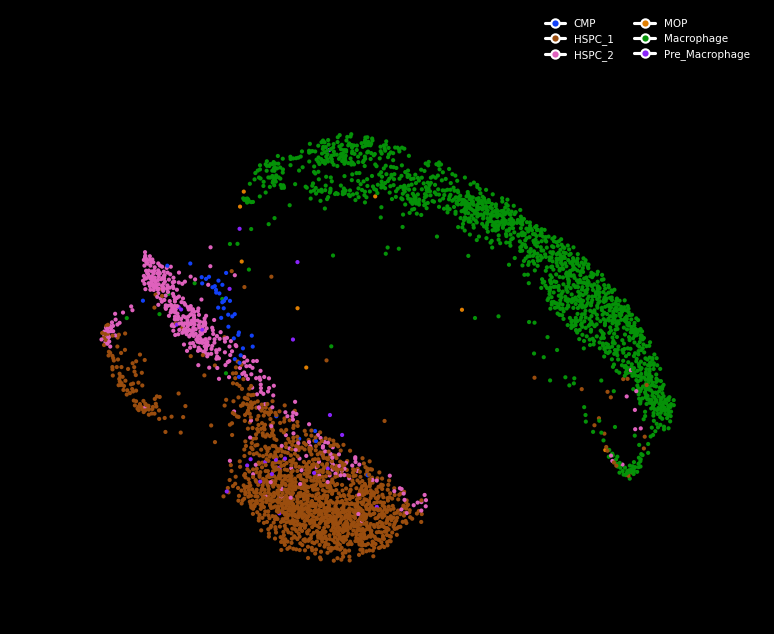

In [4]:
fpath = gph.setup_animation(adata,**model_params)

# Play the animation

In [5]:
gph.play(fpath)

# Optional convert output to gif

In [ ]:
gph.video_to_gif(fpath, fpath+".gif", fps=10)